## Import libraries

In [150]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

## Read data

In [151]:
df = pd.read_csv('Telco_customer_churn.csv')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

## Convert datatypes

In [153]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df['Total Charges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: Total Charges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


## Drop missing values and correlated values

In [154]:
# churn label is the same as churn value
df.drop(['CustomerID', 'Churn Label', 'Churn Reason'], axis=1, inplace=True)
df.dropna(inplace=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Count              7032 non-null   int64  
 1   Country            7032 non-null   object 
 2   State              7032 non-null   object 
 3   City               7032 non-null   object 
 4   Zip Code           7032 non-null   int64  
 5   Lat Long           7032 non-null   object 
 6   Latitude           7032 non-null   float64
 7   Longitude          7032 non-null   float64
 8   Gender             7032 non-null   object 
 9   Senior Citizen     7032 non-null   object 
 10  Partner            7032 non-null   object 
 11  Dependents         7032 non-null   object 
 12  Tenure Months      7032 non-null   int64  
 13  Phone Service      7032 non-null   object 
 14  Multiple Lines     7032 non-null   object 
 15  Internet Service   7032 non-null   object 
 16  Online Security    7032 non-n

## Distribution of numeric columns

In [155]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Count,7032.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Zip Code,7032.0,93523.032565,1865.515958,90001.000000,92102.000000,93552.500000,95354.000000,96161.000000
Latitude,7032.0,36.283307,2.456118,32.555828,34.030915,36.391777,38.227285,41.962127
Longitude,7032.0,-119.799215,2.157588,-124.301372,-121.815412,-119.735410,-118.043237,-114.192901
Tenure Months,7032.0,32.421786,24.545260,1.000000,9.000000,29.000000,55.000000,72.000000
Monthly Charges,7032.0,64.798208,30.085974,18.250000,35.587500,70.350000,89.862500,118.750000
Total Charges,7032.0,2283.300441,2266.771362,18.800000,401.450000,1397.475000,3794.737500,8684.800000
Churn Value,7032.0,0.265785,0.441782,0.000000,0.000000,0.000000,1.000000,1.000000
Churn Score,7032.0,58.715301,21.531321,5.000000,40.000000,61.000000,75.000000,100.000000
CLTV,7032.0,4401.445108,1182.414266,2003.000000,3469.750000,4527.500000,5381.000000,6500.000000


## Delete no information columns

In [156]:
for col in df.columns:
    if df[col].dtype != 'int64' and df[col].dtype != 'float64':
            print(f'{col} : {df[col].unique()}')
not_neccesary = ['Country', 'State', 'Count', 'Zip Code', 'Lat Long']
df.drop(not_neccesary, axis=1, inplace=True)

Country : ['United States']
State : ['California']
City : ['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Tulelake'
 'Olympic Valley' 'Redcrest']
Lat Long : ['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '41.813521, -121.492666' '39.191797, -120.212401'
 '40.363446, -123.835041']
Gender : ['Male' 'Female']
Senior Citizen : ['No' 'Yes']
Partner : ['No' 'Yes']
Dependents : ['No' 'Yes']
Phone Service : ['Yes' 'No']
Multiple Lines : ['No' 'Yes' 'No phone service']
Internet Service : ['DSL' 'Fiber optic' 'No']
Online Security : ['Yes' 'No' 'No internet service']
Online Backup : ['Yes' 'No' 'No internet service']
Device Protection : ['No' 'Yes' 'No internet service']
Tech Support : ['No' 'Yes' 'No internet service']
Streaming TV : ['No' 'Yes' 'No internet service']
Streaming Movies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'Two year' 'One year']
Paperless Billing : ['Yes' 'No']
Payment Method : ['Mailed check' 'Electronic check' 

## Univariate analysis of numerical features

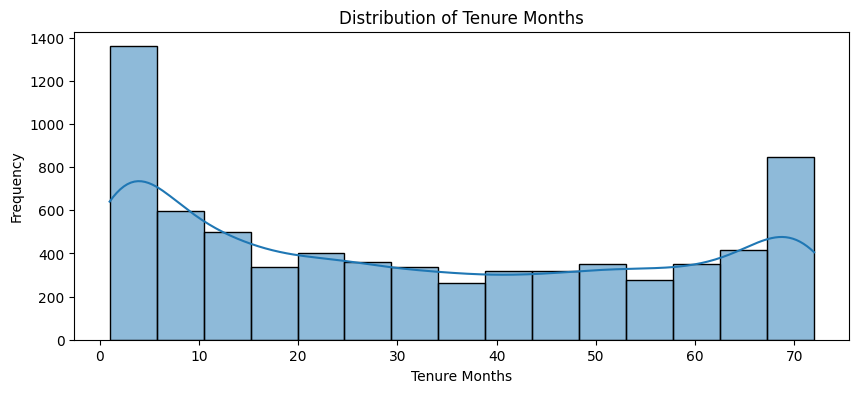

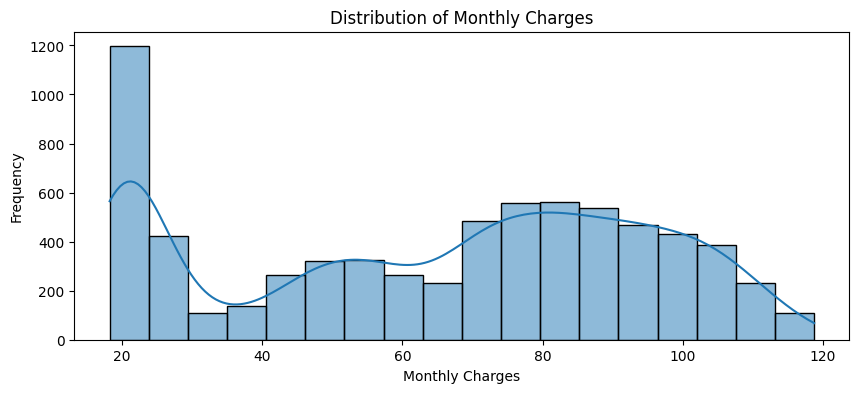

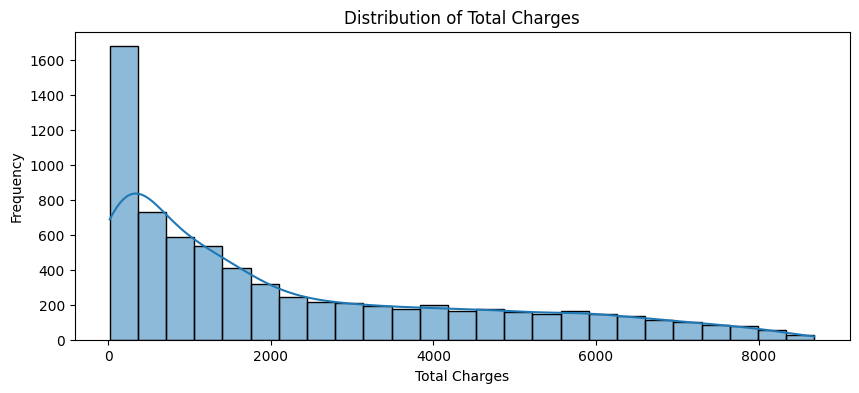

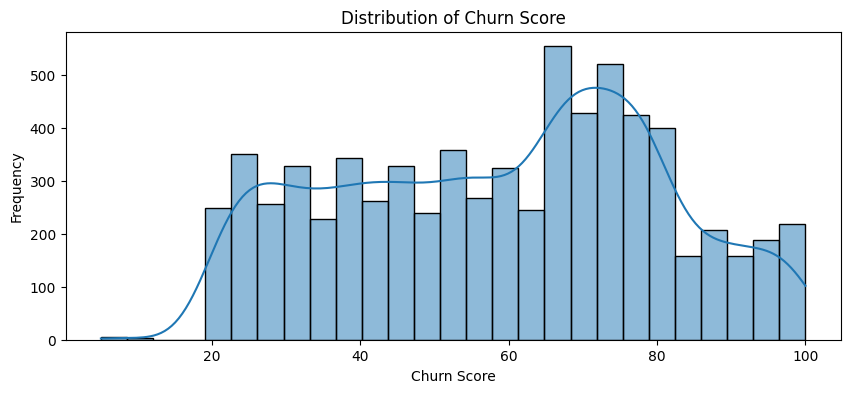

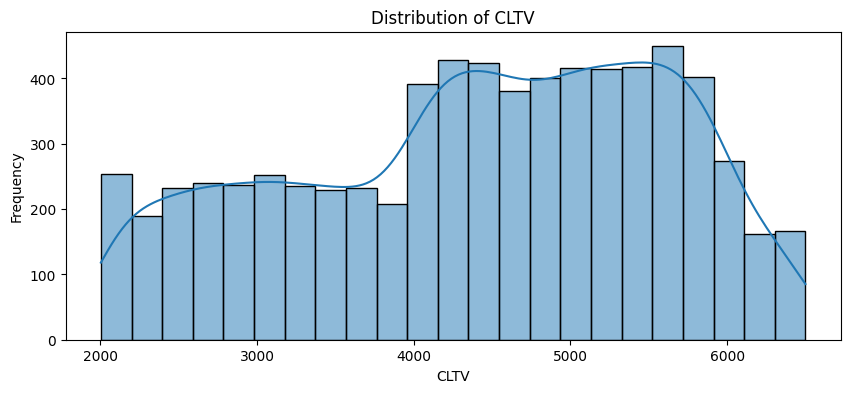

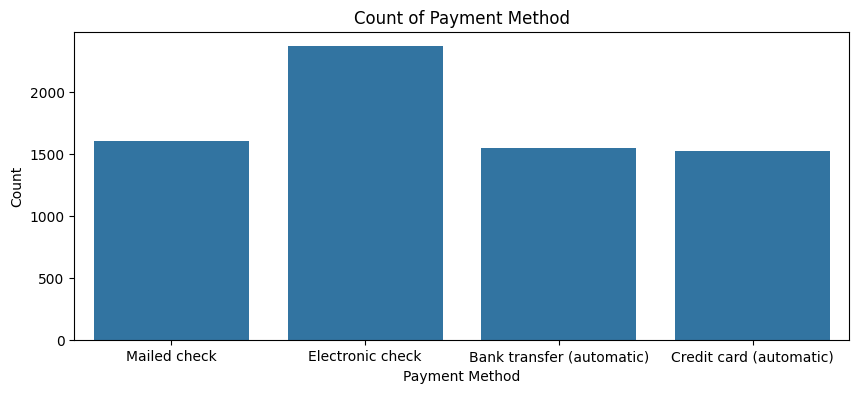

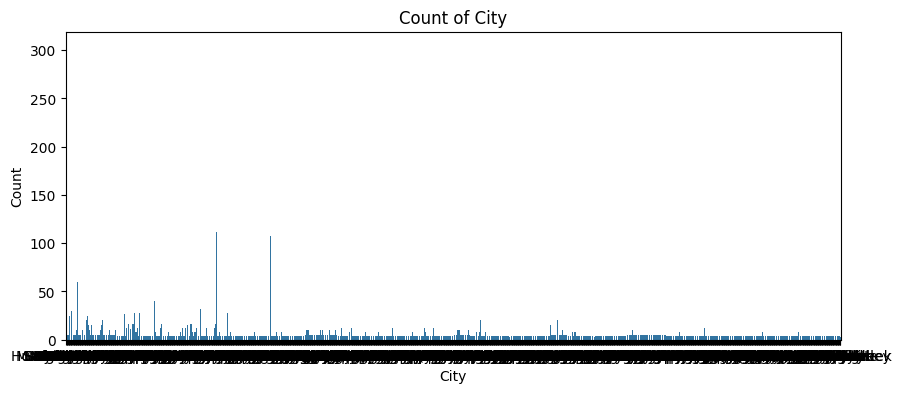

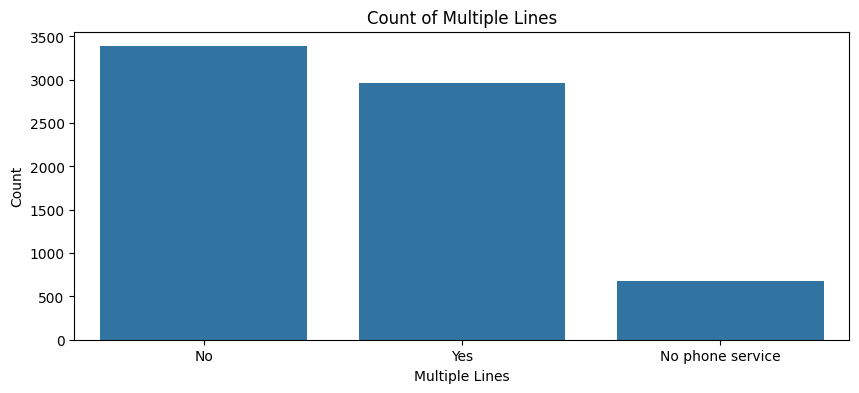

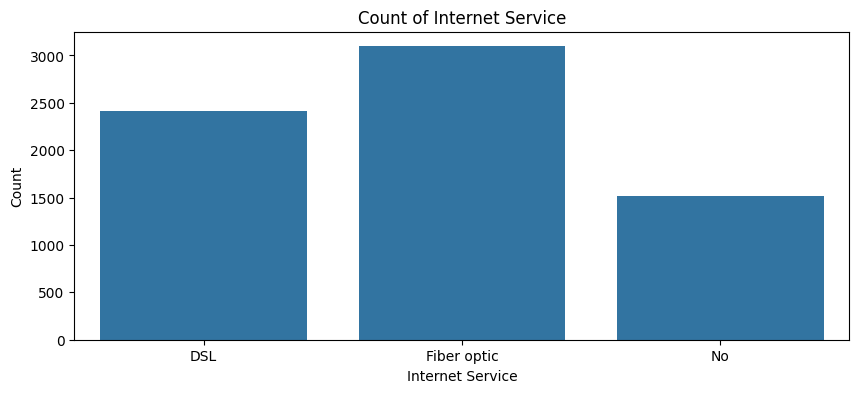

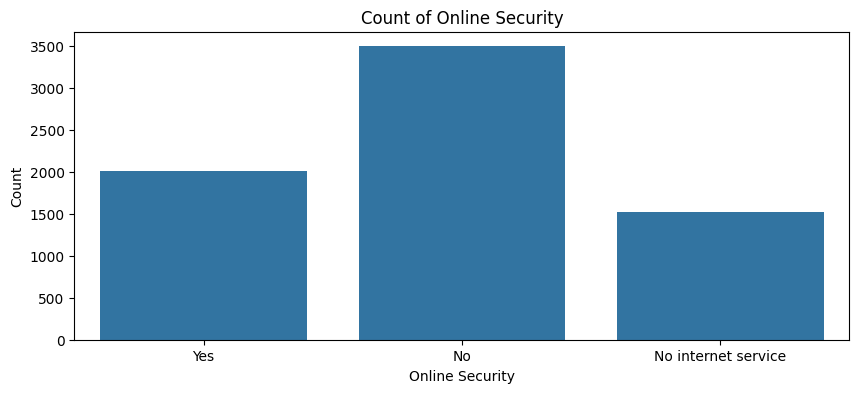

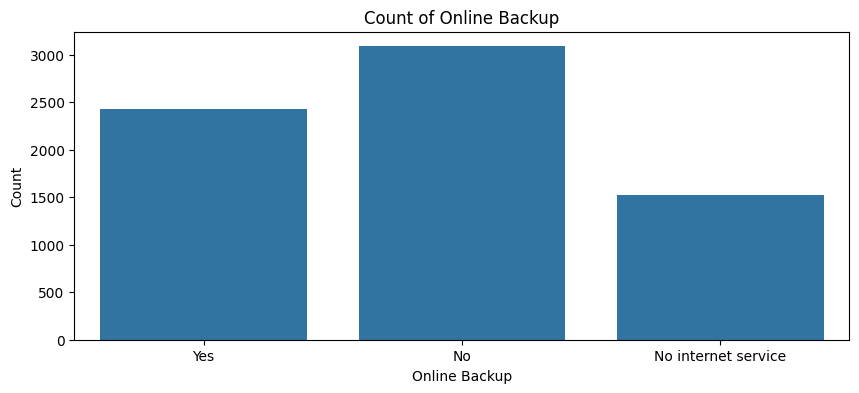

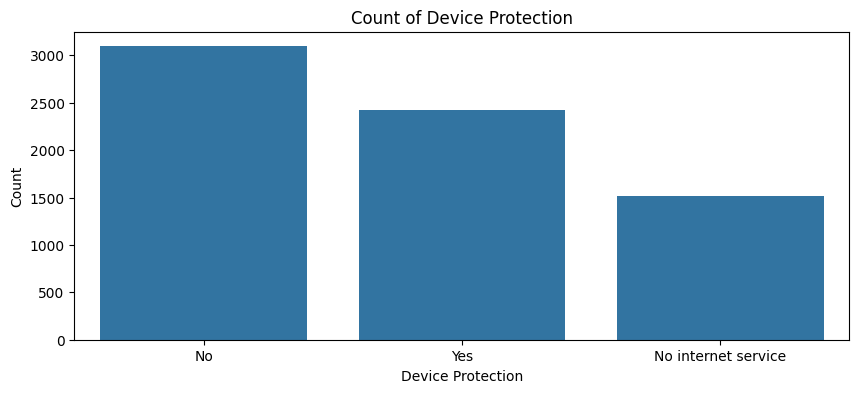

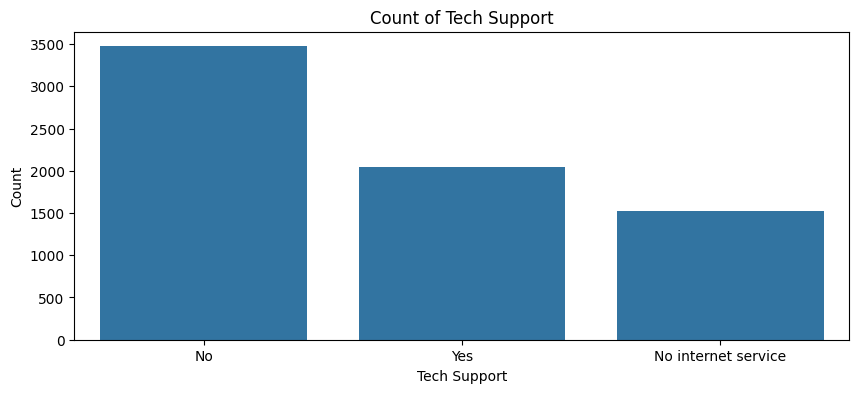

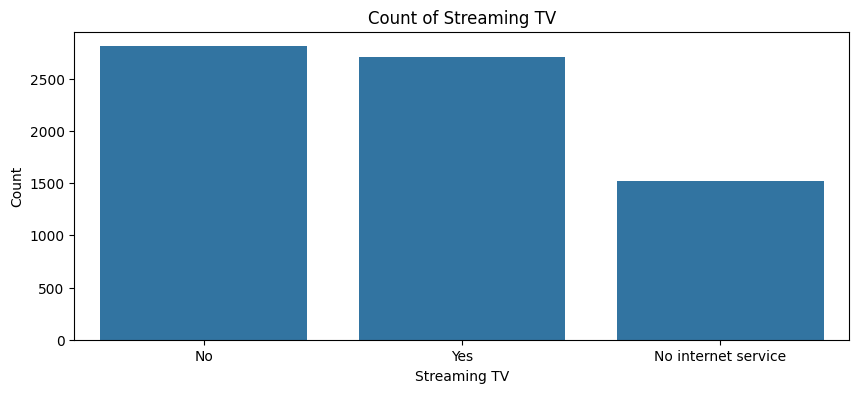

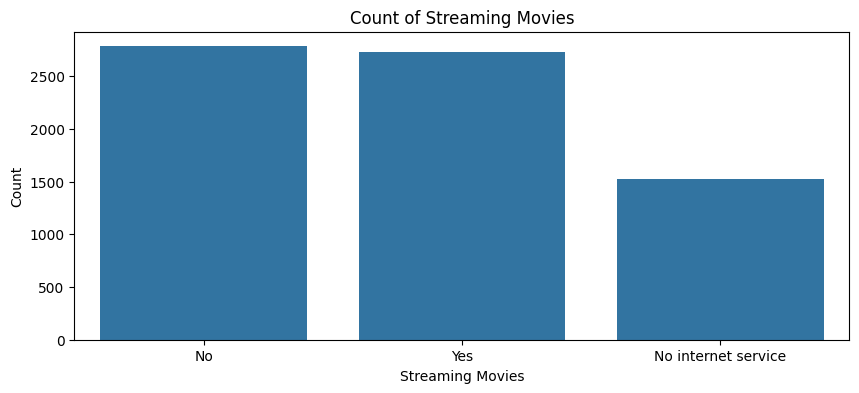

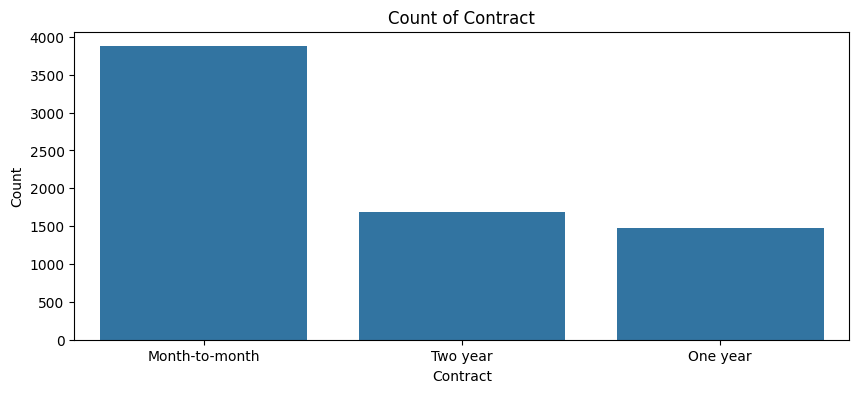

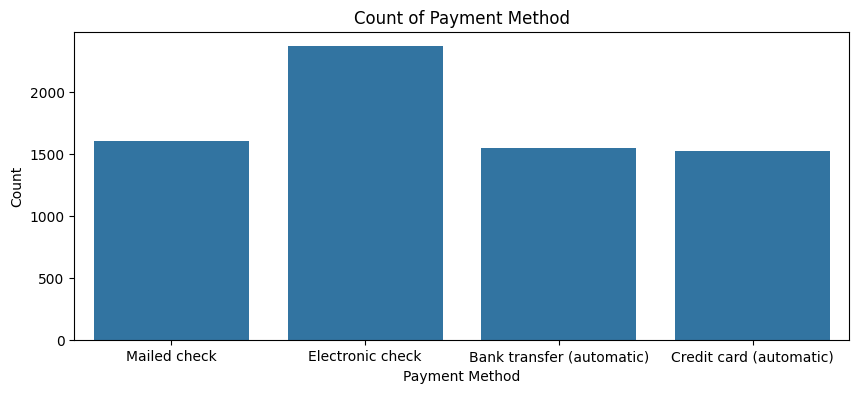

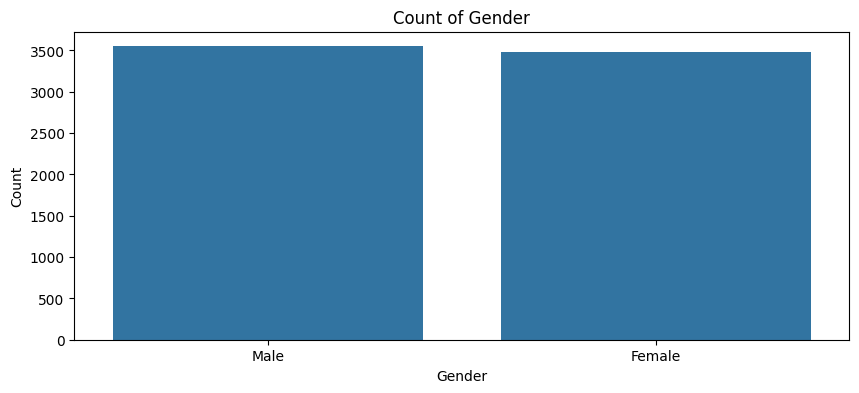

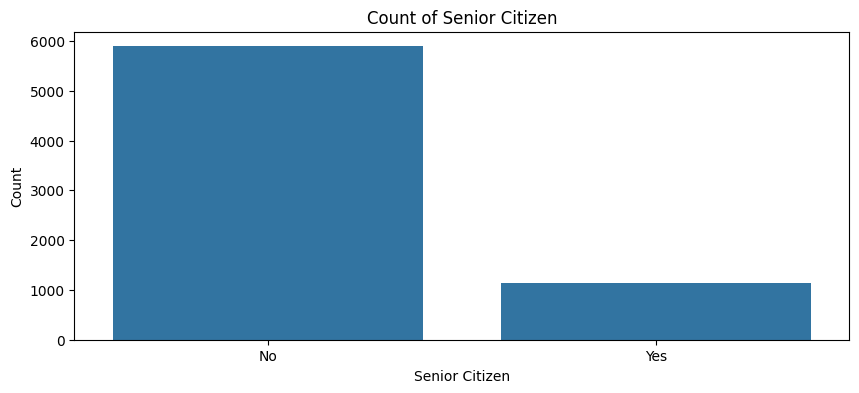

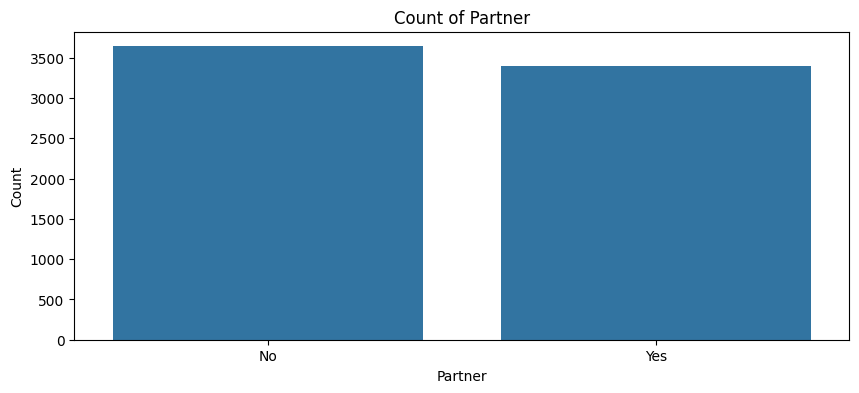

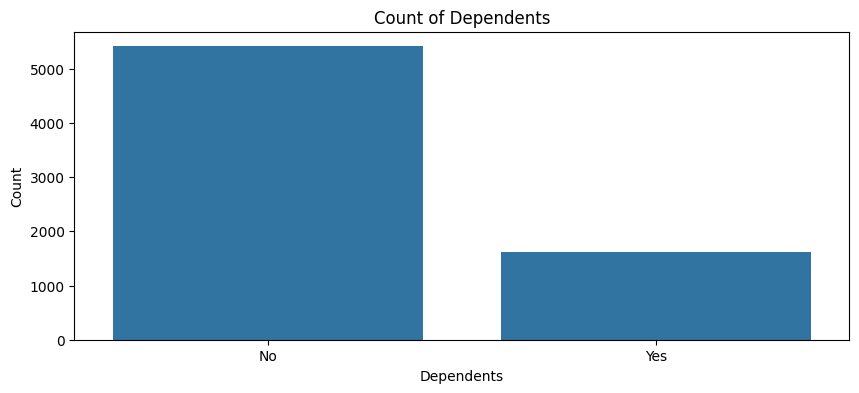

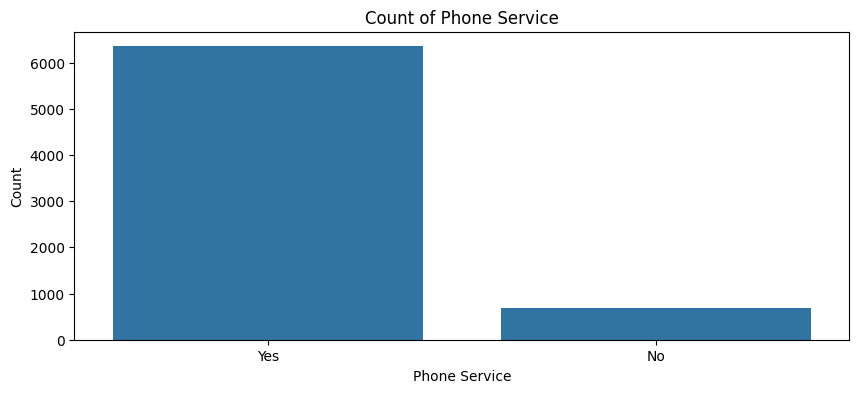

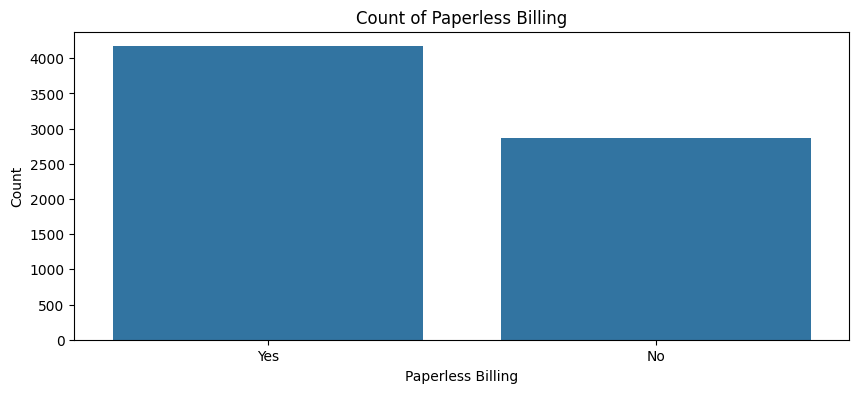

In [157]:
numerical_features = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV']

for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Univariate analysis of categorical features
categorical_features = ['Payment Method', 'City', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Payment Method', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing']

for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=feature, data=df)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


## Bivariate analysis of numerical features against the target variable

ValueError: RGBA sequence should have length 3 or 4

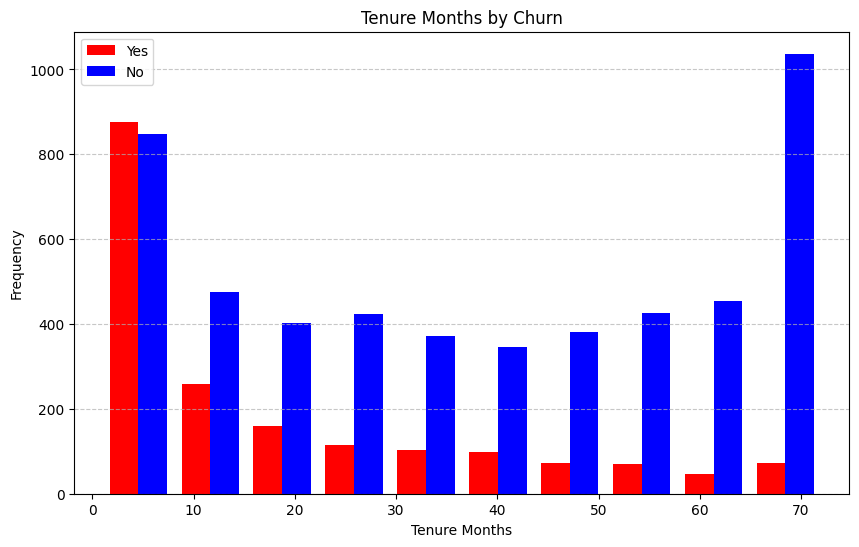

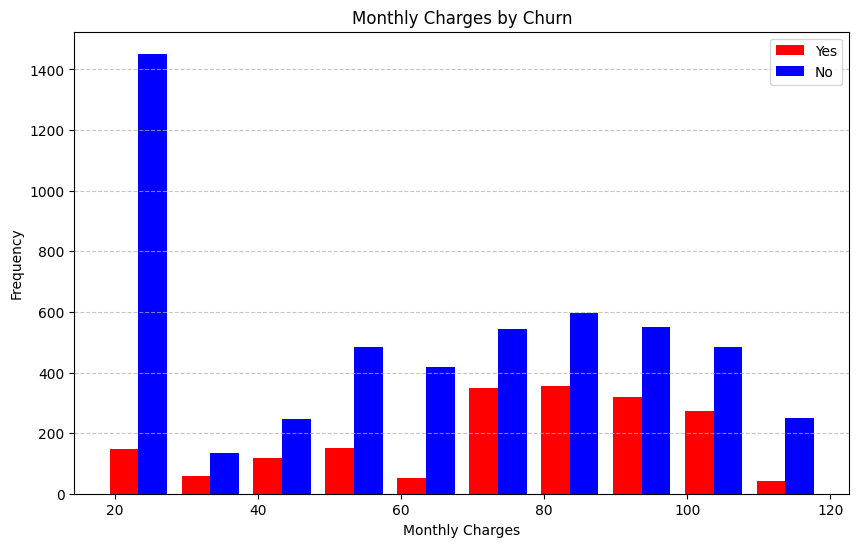

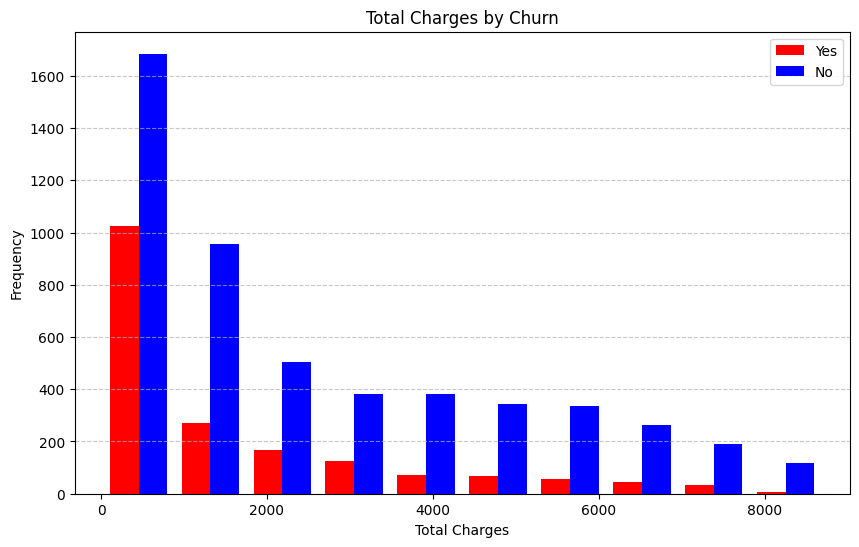

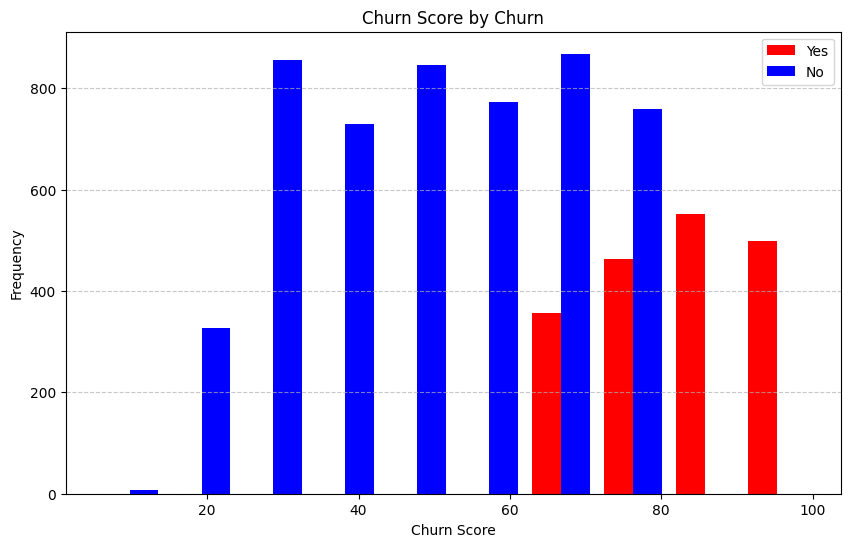

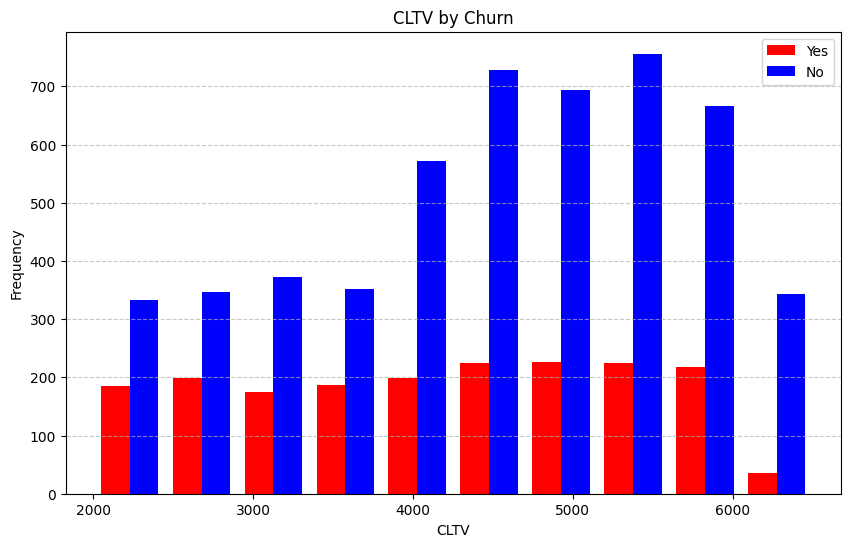

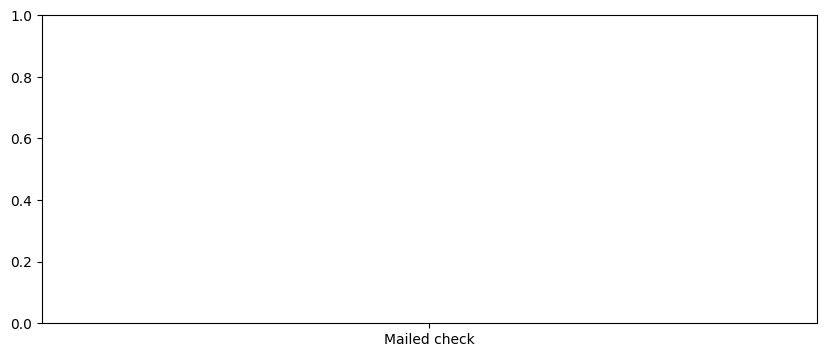

In [158]:
target_variable = 'Churn Value'
churned = df[df[target_variable] == 1]
not_churned = df[df[target_variable] == 0]

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    plt.hist([churned[feature], not_churned[feature]], bins=10, color=['red', 'blue'], label=['Yes', 'No'])
    plt.title(f'{feature} by Churn')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Bivariate analysis of categorical features against the target variable
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=feature, hue=target_variable, data=df, color=['red', 'blue'])
    plt.title(f'{feature} vs {target_variable}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

## Encode categorical features

In [ ]:
label_encoded = ['Payment Method', 'City', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Payment Method', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing']
Label_Encoded = LabelEncoder()
for column in label_encoded:
    df[column] = Label_Encoded.fit_transform(df[column])
df.info()

## Scale for normalization numerical features

In [ ]:
scaler = StandardScaler()
X = df.drop('Churn Value', axis=1)
y = df['Churn Value']
data_scaled = scaler.fit_transform(X)

## Save prepared dataset

In [ ]:
df.to_csv('Explored.csv')